# Eksempler på datasett for lineær regresjon

In [6]:
import pandas as pd # lese data fra csv-fil og bruke DataFrames
import seaborn as sns # plotting
sns.set(style = 'whitegrid', font_scale = 1.5) # utseende av plott
import matplotlib.pyplot as plt # mer plotting
import numpy as np # matematikk
import statsmodels.api as sms # regresjonen
import statsmodels.formula.api as smf # formel for regresjonen

## Eksempel 1: Sykkel

Datasettet 'sykkel.csv' inneholder registrert kaloriforbruk, tid og høyeste målte puls (makspuls) på 38 innendørs sykkel-økter. Tid og puls ble registrert med en treningsklokke, og treningsklokka har en innebygd algoritme som (sammen med konstanter slik som personens kjønn, alder, vekt, ...) beregner kaloriforbruket på en treningsøkt. For denne typen treningsøkter skal vi avgjøre om det er tid eller makspuls (høyeste målte puls) som er den beste forklaringsvariabelen for kaloriforbruk. 

 plotter `y = Kalorier` mot `x = MaksPuls` og `y = Kalorier` mot `x = Tid` med en plottefunksjon som også viser estimert regresjonslinje og 95% konfidensintervall for linja. Kanskje ser du allerede hvilken modell som vi ha høyeste $R^2$, alså høyeste andel forklart varians i kaloriforbruk? 

### Steg 1: Lese inn og se på dataene

Vi leser inn datasettet 'sykkel.csv' og plotter `y = Kalorier` mot `x = MaksPuls` og `y = Kalorier` mot `x = Tid` med en plottefunksjon som også viser estimert regresjonslinje og 95% konfidensintervall for linja. Kanskje ser du allerede hvilken modell som vi ha høyeste $R^2$, alså høyeste andel forklart varians i kaloriforbruk? 

In [10]:
dfsykkel = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/python_felles/sykkel.csv') # lese inn datasettet
dfsykkel.head()

,Kalorier,Tid,MaksPuls
0,324,30.116667,185
1,376,36.766667,184
2,366,39.166667,181
3,361,38.216667,189
4,378,39.116667,186


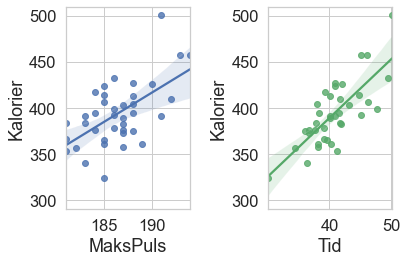

In [11]:
plt.subplot(1, 2, 1)
sns.regplot(x='MaksPuls', y='Kalorier', data=dfsykkel)
plt.ylim(290,510)

plt.subplot(1, 2, 2)
sns.regplot(x='Tid', y='Kalorier', color ="g", data=dfsykkel)
plt.ylim(290,510)

plt.tight_layout(); plt.show()

### Steg 2: Tilpasse regresjonsmodell

I koden nedenfor har vi tilpasset en slik lineær regresjonsmodell for `Kalorier` som funksjon av på `MaksPuls`. Finn ut hvor god modellen er, og sammenlign med en ny modell der du bytter ut `MaksPuls` med `Tid`. 

In [12]:
sykkelmodell = smf.ols('Kalorier~Tid', data=dfsykkel).fit()
sykkelmodell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Kalorier   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     48.17
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.93e-08
Time:                        13:21:21   Log-Likelihood:                -171.82
No. Observations:                  38   AIC:                             347.6
Df Residuals:                      36   BIC:                             350.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.3837     37.689      3.539      0.001      56.947     209.821
Tid            6.3946      0.921      6.940      0.000       4.526       8.263
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.033
Skew:                           0.139   Prob(JB):                        0.597
Kurtosis:                       2.241   Cond. No.                         416.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eksempel 2: Simulerte data i tre ulike datasett

Vi har generert tre ulike datasett som hver inneholder observasjoner av en kovariat ($x$) en responsvariabel $y$. 

In [13]:
filA="https://www.math.ntnu.no/emner/IST100x/python_felles/dataA.csv"
filB="https://www.math.ntnu.no/emner/IST100x/python_felles/dataB.csv"
filC="https://www.math.ntnu.no/emner/IST100x/python_felles/dataC.csv"

In [16]:
minfil=filA # endre til hvilken fil du skal bruke
df = pd.read_csv(minfil)
df.head()

,y,x
0,2.952822,4.201277
1,5.445425,2.529570
2,4.102380,3.971303
3,4.192746,3.607940
4,3.621047,4.285657


### Steg 1: Kryssplott

Under finner du et kryssplott av x mot y. Hvilken sammenheng er det mellom x og y?

- trolig ingen?
- positiv lineær sammenheng?
- negativ lineær sammenheng?
- ikke-lineær sammenheng?

          y         x
y  1.000000 -0.869797
x -0.869797  1.000000


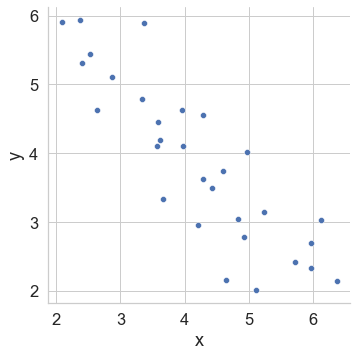

In [18]:
sns.relplot(x="x", y="y",data = df)

print(df.corr()) # dette er en matrise med korrelasjonskoeffisienten i element 2,1 og 1,2

### Steg 2: Tilpasse regresjonsmodell

In [20]:
modell = smf.ols('y~x',df).fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     87.01
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           4.37e-10
Time:                        13:26:39   Log-Likelihood:                -26.153
No. Observations:                  30   AIC:                             56.31
Df Residuals:                      28   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4810      0.402     18.587      0.000       6.657       8.306
x             -0.8633      0.093     -9.328      0.000      -1.053      -0.674
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.191
Skew:                          -0.190   Prob(JB):                        0.909
Kurtosis:                       3.092   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""